Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import choices

# Define Student Class
Contain information about the illness state of the student

In [2]:
class Student:
    def __init__(self, name, health):
        self.health = health
        self.name   = name
    def makeSick(self):
        self.health = 0
    def __repr__(self):
        return self.name

# Generate students
We can use a method to generate a list of healthy students with an initial infected one. 
Hold the information of all students in a dictionary (?) which will be separated into two: 
- Sick ones
- Healthy ones

In [3]:
def generate_students(n_students):
    healthies    = [Student(name = "Student" + str(i), health = 1) for i in range(1, n_students)]
    infected     = [Student(name = "Student" + str(0), health = 0)]
    all_students = {}
    all_students["Healthies"] = healthies
    all_students["Infecteds"] = infected
    return all_students

# Interact students
1. Iterate through the lists in the dict. 
2. Choose a random number between 0 and 1. If it is smaller than the parameter, infect the healthy student. If in the second iteration you encounter the same student and the randomly generated number is larger than the parameter, don't un-infect the student but retain the infected state.
3. If a student is infected, remove him from the healthy list and add to the infected one.

This will form one "day" of the whole simulation. The infection parameter can be retained the same, or can be manipulated daily to represent mutations or mode of infection.

In [4]:
def day(students, parameter, probability_decay = 0):
    #print("Student states before the day: ")
    #print(students)
    # probability of not infecting
    for infected in students["Infecteds"]:
        for healthy in students["Healthies"]:
            #print("Interaction between healthy ", healthy, " and infected ", infected)
            random_number = choices([0,1], [1-parameter-probability_decay, parameter-probability])[0]
            #print("Choice: ", random_number)
            if random_number == 1:
                healthy.makeSick()
                #print(healthy, " is infected.")
                students["Healthies"].remove(healthy)
                students["Infecteds"].append(healthy)
            #else:
                #print(healthy, " is not infected.")
    #print("Student states at the end of the day: ")
    #print(students)
    #print("Number of infected students: ", len(students["Infecteds"]))    

Count the number of days required to infect the whole population. Run the simulation n times and find frequencies of number of days required the whole population. This function is for one run until the whole population is infected.

In [5]:
def iteration(number_of_students, parameter):
    students = generate_students(number_of_students)
    no_infected_students = len(students["Infecteds"])
    days_passed = 0
    while no_infected_students != number_of_students:
        print("=================")
        print("DAY ", days_passed)
        day(students, parameter)
        print("=================")
        no_infected_students = len(students["Infecteds"])
        days_passed += 1

    print(days_passed, " days have passed to infect the whole population.")
    return days_passed


In [6]:
n_students    = 60
parameter     = 0.05
n_trials      = 30
required_days = [iteration(n_students, parameter) for i in range(n_trials)]

DAY  0
DAY  1
2  days have passed to infect the whole population.
DAY  0
DAY  1
2  days have passed to infect the whole population.
DAY  0
DAY  1
2  days have passed to infect the whole population.
DAY  0
DAY  1
2  days have passed to infect the whole population.
DAY  0
DAY  1
2  days have passed to infect the whole population.
DAY  0
DAY  1
DAY  2
3  days have passed to infect the whole population.
DAY  0
DAY  1
2  days have passed to infect the whole population.
DAY  0
DAY  1
2  days have passed to infect the whole population.
DAY  0
DAY  1
2  days have passed to infect the whole population.
DAY  0
DAY  1
2  days have passed to infect the whole population.
DAY  0
DAY  1
2  days have passed to infect the whole population.
DAY  0
DAY  1
2  days have passed to infect the whole population.
DAY  0
DAY  1
2  days have passed to infect the whole population.
DAY  0
DAY  1
DAY  2
3  days have passed to infect the whole population.
DAY  0
DAY  1
2  days have passed to infect the whole populati

# Plot the histogram

(array([25.,  5.]), array([2, 3, 4]), <BarContainer object of 2 artists>)

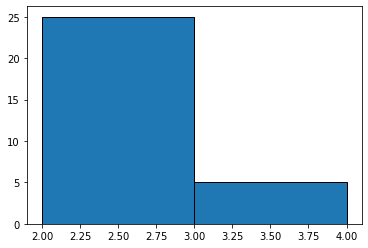

In [7]:
plt.hist(required_days, edgecolor='black', bins=np.arange(min(required_days), max(required_days) + 1, 1)) 